This file is for the first paper, and it's using the model_first_paper.py for the agents

The reporters won't store the agents' position

In [1]:
from model_first_paper import *
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\leona\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
map_width = 50
map_height = 50
moore = False

#Number of commuters, taxis, and noises
num_of_motorist = [30,25,10]

#With inventory
inv_size = 12
cp_size = int(np.ceil(inv_size/3))

#Without inventory
#cp_size = 10

model = switching_model(num_of_motorist,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="random")

4


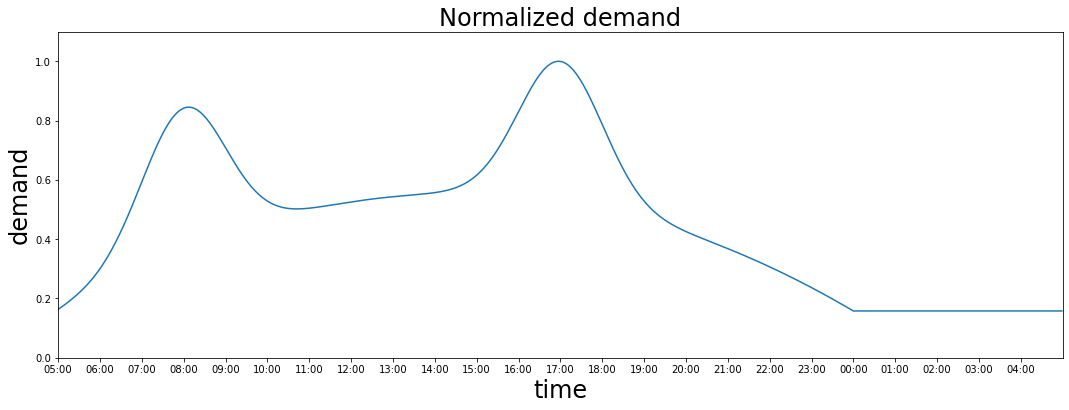

In [3]:
model.draw_prob_des()

In [4]:
#run model
#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

In [5]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Charge Alive
Step AgentID                   
0    0        1522.725923  None
     1         312.427048  None
     2         397.602217  None
     3        1732.263804  None
     4        2301.739574  None

In [6]:
id_commuter = []
id_taxi = []
id_noise = []
for mot in model.motorists:
    if mot.status == "commuter":
        id_commuter.append(mot.unique_id)
    elif mot.status == "taxi":
        id_taxi.append(mot.unique_id)
    elif mot.status == "noise":
        id_noise.append(mot.unique_id)

print(id_commuter)
print(id_taxi)
print(id_noise)

[129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
[159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
[184, 185, 186, 187, 188, 189, 190, 191, 192, 193]


In [42]:
agent_data

,Charge,Alive
AgentID,,
0,1522.725923,None
1,312.427048,None
2,397.602217,None
3,1732.263804,None
4,2301.739574,None
...,...,...
193,NaN,True
194,NaN,None
195,NaN,None


In [45]:
type = ['none']*id_commuter[0]
commuter = ['commuter']*30
taxi = ['taxi']*25
noise = ['noise']*10
station = ['none']*4
type = type + commuter + taxi + noise + station
type = type*num_of_step
agent_data['type'] = type
agent_data

Charge  Alive   type
Step  AgentID                           
0     0        1522.725923   None   none
      1         312.427048   None   none
      2         397.602217   None   none
      3        1732.263804   None   none
      4        2301.739574   None   none
...                    ...    ...    ...
20159 193              NaN  False  noise
      194              NaN   None   none
      195              NaN   None   none
      196              NaN   None   none
      197              NaN   None   none

[3991680 rows x 3 columns]

In [68]:
temp = agent_data.loc[(20159)]
temp = temp[(temp['Alive'] == True) | (temp['Alive'] == False)]
temp.reset_index( drop = True, inplace =True )
temp_ = ['commuter', 'taxis', 'noise']
type_ = []
for i in range(len(num_of_motorist)):
    for j in range(num_of_motorist[i]):
        type_.append(temp_[i])
temp['type'] = type_
final = temp[temp['Alive'] == True]
final.type.value_counts()
#temp

,Charge,Alive
AgentID,,
129,NaN,True
130,NaN,True
131,NaN,True
132,NaN,True
133,NaN,True
...,...,...
189,NaN,True
190,NaN,True
191,NaN,True


In [56]:
num_of_motorist[i]

30

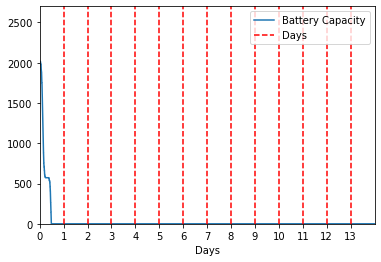

In [5]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [63]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,3,0
20156,3,0
20157,3,0
20158,3,0
20159,3,0


In [106]:
agent_data[agent_data['Alive'] == True].reset_index().groupby(['Step'])['type'].value_counts()[0]

type
commuter    30
taxi        25
noise       10
Name: type, dtype: int64

In [107]:
alive_motorist,alive_taxi, alive_noise = [],[],[]
df_ = agent_data[agent_data['Alive'] == True].reset_index().groupby(['Step'])['type'].value_counts()
for i in range(num_of_step):
    print(i,'/',num_of_step)
    try :
        x = df_[i].loc['commuter']
    except :
        x = 0
    try :
        y = df_[i].loc['taxi']
    except :
        y = 0
    try :
        z = df_[i].loc['noise']
    except :
        z = 0
    alive_motorist.append(x)
    alive_taxi.append(y) 
    alive_noise.append(z)

0 / 20160
1 / 20160
2 / 20160
3 / 20160
4 / 20160
5 / 20160
6 / 20160
7 / 20160
8 / 20160
9 / 20160
10 / 20160
11 / 20160
12 / 20160
13 / 20160
14 / 20160
15 / 20160
16 / 20160
17 / 20160
18 / 20160
19 / 20160
20 / 20160
21 / 20160
22 / 20160
23 / 20160
24 / 20160
25 / 20160
26 / 20160
27 / 20160
28 / 20160
29 / 20160
30 / 20160
31 / 20160
32 / 20160
33 / 20160
34 / 20160
35 / 20160
36 / 20160
37 / 20160
38 / 20160
39 / 20160
40 / 20160
41 / 20160
42 / 20160
43 / 20160
44 / 20160
45 / 20160
46 / 20160
47 / 20160
48 / 20160
49 / 20160
50 / 20160
51 / 20160
52 / 20160
53 / 20160
54 / 20160
55 / 20160
56 / 20160
57 / 20160
58 / 20160
59 / 20160
60 / 20160
61 / 20160
62 / 20160
63 / 20160
64 / 20160
65 / 20160
66 / 20160
67 / 20160
68 / 20160
69 / 20160
70 / 20160
71 / 20160
72 / 20160
73 / 20160
74 / 20160
75 / 20160
76 / 20160
77 / 20160
78 / 20160
79 / 20160
80 / 20160
81 / 20160
82 / 20160
83 / 20160
84 / 20160
85 / 20160
86 / 20160
87 / 20160
88 / 20160
89 / 20160
90 / 20160
91 / 2016

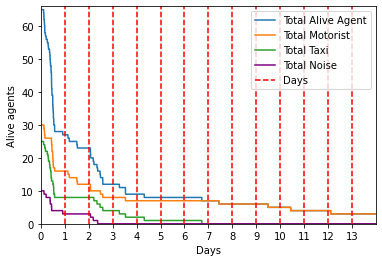

In [120]:
step = [i for i in range(num_of_step)]
plt.plot(model_data["num_of_alive"])
plt.plot(step, alive_motorist)
plt.plot(step, alive_taxi)
plt.plot(step, alive_noise,color = 'purple')
plt.ylim([0,sum(num_of_motorist) + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i,color = 'red', linestyle='--', label = 'axvline - full height')
plt.legend(['Total Alive Agent', 'Total Motorist', 'Total Taxi', 'Total Noise' ,'Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

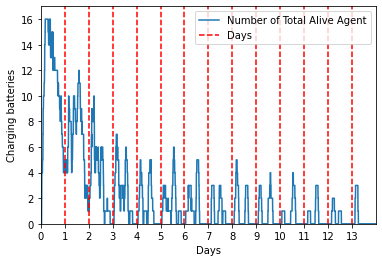

In [109]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [110]:
#Cek kategori motorist yang hidup
commuter_alive = 0
taxi_alive = 0
noise_alive = 0

for mot in model.motorists:
    if mot.alive:
        if mot.status == "commuter":
            commuter_alive +=1
        elif mot.status == "taxi":
            taxi_alive +=1
        elif mot.status == "noise":
            noise_alive += 1

print("Jumlah pemotor yang hidup masing-masing sebagai berikut:")
print('Commuter: ' + str(commuter_alive))
print('Taxi: ' + str(taxi_alive))
print('Noise: ' + str(noise_alive))

Jumlah pemotor yang hidup masing-masing sebagai berikut:
Commuter: 3
Taxi: 0
Noise: 0
